In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:

data = pd.read_csv('Mall_Customers.csv')
data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

## model training

### elboe method to determine number of clusters 

In [11]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [13]:
wcss

[269981.28,
 181665.82312925172,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37455.98455516028,
 30227.606513152015,
 24986.52564064288,
 21826.936303231654,
 19653.383606248826]

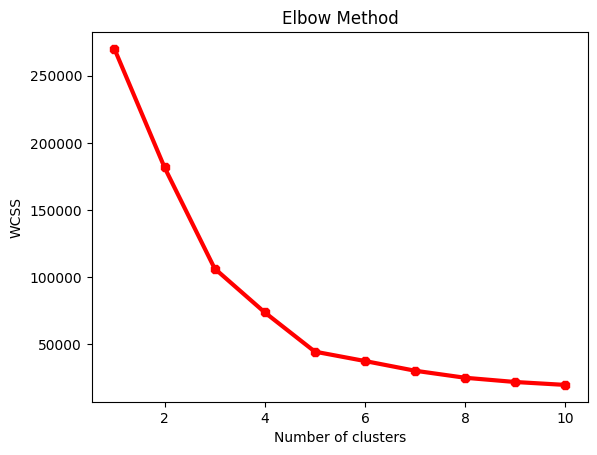

In [14]:
plt.plot(range(1,11), wcss , linewidth=3 , color='red' , marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 5 is best value for k

In [15]:
k_means = KMeans(n_clusters=5 , random_state =42)
y_means = k_means.fit_predict(X)

In [16]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

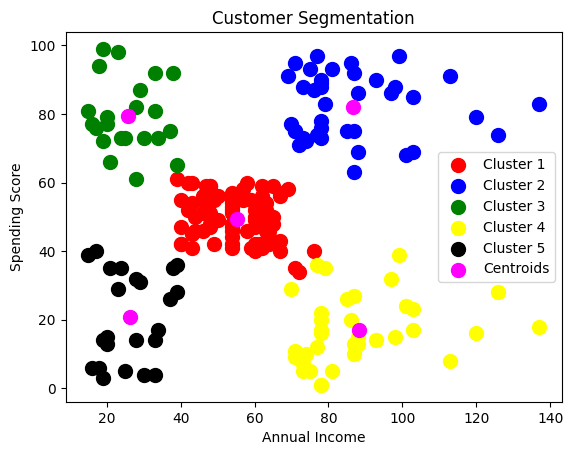

In [17]:
plt.scatter(X.iloc[y_means == 0 , 0] ,  X.iloc[y_means == 0 , 1] , s = 100 , c='red' , label='Cluster 1')
plt.scatter(X.iloc[y_means == 1 , 0] ,  X.iloc[y_means == 1 , 1] , s = 100 , c='blue' , label='Cluster 2')
plt.scatter(X.iloc[y_means == 2 , 0] ,  X.iloc[y_means == 2 , 1] , s = 100 , c='green' , label='Cluster 3')
plt.scatter(X.iloc[y_means == 3 , 0] ,  X.iloc[y_means == 3 , 1] , s = 100 , c='yellow' , label='Cluster 4')
plt.scatter(X.iloc[y_means == 4 , 0] ,  X.iloc[y_means == 4, 1] , s = 100 , c='black' , label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1] , s = 100 , c='magenta' , label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')    
plt.legend()
plt.show()

In [19]:
k_means.predict([[10,6]])

array([4])

## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
x_scaled = StandardScaler().fit_transform(X)

In [24]:

dbscan = DBSCAN(eps=0.40, min_samples=5) 
labels = dbscan.fit_predict(x_scaled)

data['Cluster'] = labels


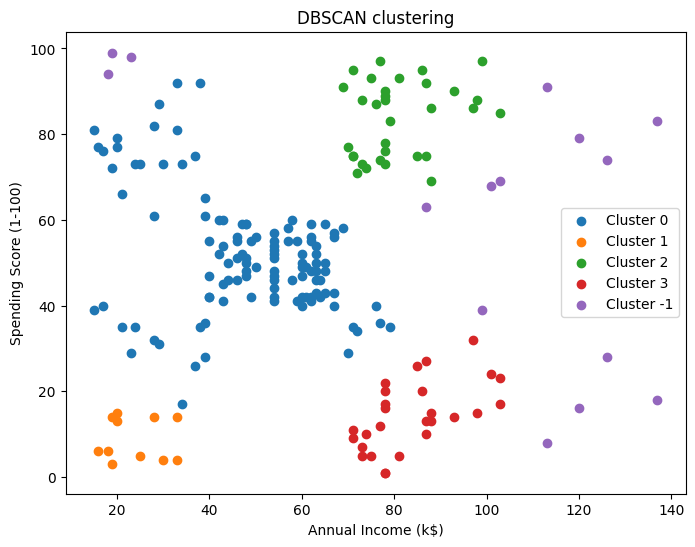

In [26]:
#plot the clusters
plt.figure(figsize=(8,6))
for cluster in set(labels):
    plt.scatter(X.iloc[labels == cluster , 0] , X.iloc[labels == cluster , 1] , label = f"Cluster {cluster}")
plt.title("DBSCAN clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [27]:
#  noise
num_noise_points = np.sum(labels == -1)
print(f"Number of noise points: {num_noise_points}")

Number of noise points: 15


### saved model

In [30]:
import pickle

In [31]:
pickle.dump(k_means , open('k_means.pkl' , 'wb'))